In [2]:
import rdkit
import random
import numpy as np
from rdkit import Chem

from rdkit.Chem import AllChem, Draw
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity

from rdkit.Chem.rdMolHash import MolHash, HashFunction
from rdkit.Chem.BRICS import BreakBRICSBonds
from rdkit.Chem.rdchem import EditableMol, BondType

from IPython.display import display
from itertools import combinations, repeat
from copy import deepcopy

from RandMol import PrepMolFrags, RandAssemFrags, \
    MakeMolFragDict, DrawMolFragDict, CreatePathStateDict, \
    ReportPathDict, GenRandPath

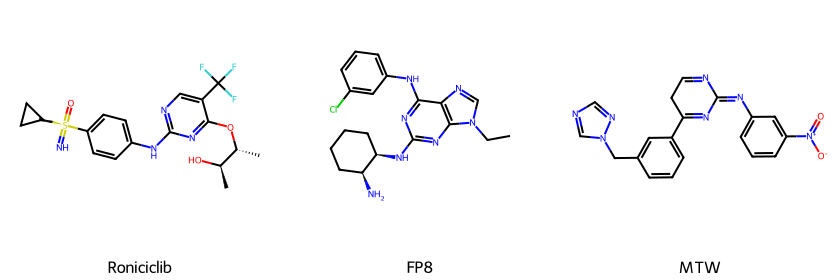

In [3]:
roni_smi = 'C[C@H]([C@@H](C)OC1=NC(=NC=C1C(F)(F)F)NC2=CC=C(C=C2)[S@](=N)(=O)C3CC3)O'
roni = Chem.MolFromSmiles(roni_smi)

fp8_smi = "CCn1cnc2c1nc(nc2Nc3cccc(c3)Cl)N[C@@H]4CCCC[C@@H]4N"
fp8 = Chem.MolFromSmiles(fp8_smi)

mtw_smi = "c1cc(cc(c1)C2=N/C(=N\c3cccc(c3)[N+](=O)[O-])/N=CC2)Cn4cncn4"
mtw = Chem.MolFromSmiles(mtw_smi)

mol_pics = Draw.MolsToGridImage([roni,fp8,mtw], 
                     legends = ['Roniciclib','FP8','MTW'], 
                     useSVG = True,
                     subImgSize = (280,280))



## Mol Graph Decomposition

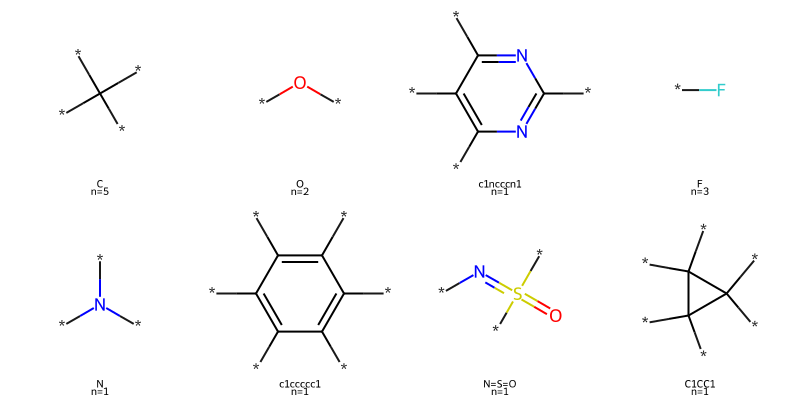

In [4]:
mol_frags = PrepMolFrags(roni)
frag_dict = MakeMolFragDict(mol_frags)
DrawMolFragDict(frag_dict, molsPerRow = 4, subImgSize = (200,200), useSVG=True)

In [5]:
ron_frag_im = DrawMolFragDict(frag_dict, molsPerRow = 4, subImgSize = (200,200))

In [7]:
with open('roni_frags.png','wb') as png:
    png.write(ron_frag_im.data)

In [6]:
rand_mols = []
for i in range(100):
    rand_mols.append(RandAssemFrags(frag_dict, False))

## Mol Graph Random Generation
Randomly generate mol graphs with decomposed nodes (fragments)

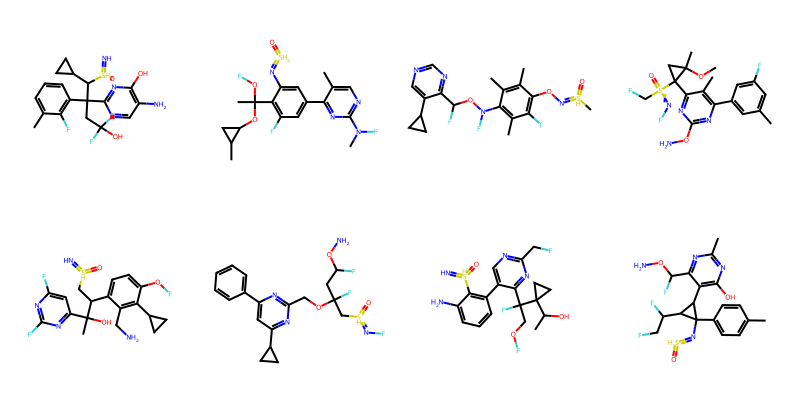

In [7]:
Draw.MolsToGridImage(rand_mols[:8], molsPerRow = 4, useSVG=True)

Create a chemical path dict with available move set. Dict is initiated by specifying the starting and ending molecules (rdkit mol)

In [13]:
path_state_dict = CreatePathStateDict(roni, fp8)
path_state_dict

{'start': {'*C(*)(*)*': {'n': 5,
   'mol': <rdkit.Chem.rdchem.Mol at 0x7fb5a8a650e0>},
  '*O*': {'n': 2, 'mol': <rdkit.Chem.rdchem.Mol at 0x7fb5a8a65460>},
  '*c1nc(*)c(*)c(*)n1': {'n': 1,
   'mol': <rdkit.Chem.rdchem.Mol at 0x7fb5a8a65620>},
  '*F': {'n': 3, 'mol': <rdkit.Chem.rdchem.Mol at 0x7fb5a8a65700>},
  '*N(*)*': {'n': 1, 'mol': <rdkit.Chem.rdchem.Mol at 0x7fb5a8a65000>},
  '*c1c(*)c(*)c(*)c(*)c1*': {'n': 1,
   'mol': <rdkit.Chem.rdchem.Mol at 0x7fb5a8a654d0>},
  '*N=S(*)(*)=O': {'n': 1, 'mol': <rdkit.Chem.rdchem.Mol at 0x7fb5a8a64c80>},
  '*C1(*)C(*)(*)C1(*)*': {'n': 1,
   'mol': <rdkit.Chem.rdchem.Mol at 0x7fb5a8a64c10>}},
 'end': {'*C(*)(*)*': {'n': 2,
   'mol': <rdkit.Chem.rdchem.Mol at 0x7fb5a8a657e0>},
  '*c1nc(*)c2nc(*)n(*)c2n1': {'n': 1,
   'mol': <rdkit.Chem.rdchem.Mol at 0x7fb5a8a65850>},
  '*N(*)*': {'n': 3, 'mol': <rdkit.Chem.rdchem.Mol at 0x7fb5a8a64cf0>},
  '*c1c(*)c(*)c(*)c(*)c1*': {'n': 1,
   'mol': <rdkit.Chem.rdchem.Mol at 0x7fb5a8a65690>},
  '*Cl': {'n': 1, '

In [10]:
rand_path = GenRandPath(path_state_dict)

In [11]:
rand_path2 = GenRandPath(path_state_dict)

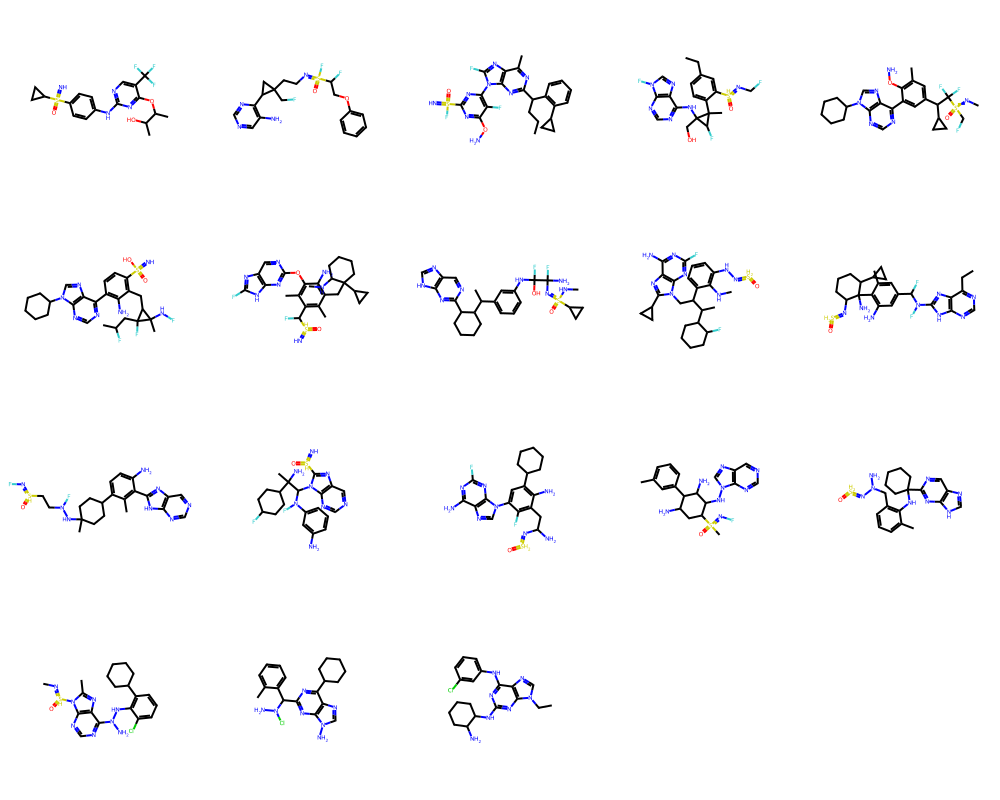

In [16]:
path1 = Draw.MolsToGridImage(
    [roni]+[rand_path[i]['mols'][0] for i in range(16)]+[fp8], 
    molsPerRow = 5, 
    useSVG = True
)

path1

In [20]:
with open('path-roni-fp8.svg', 'w') as f:
    f.write(path1.data)

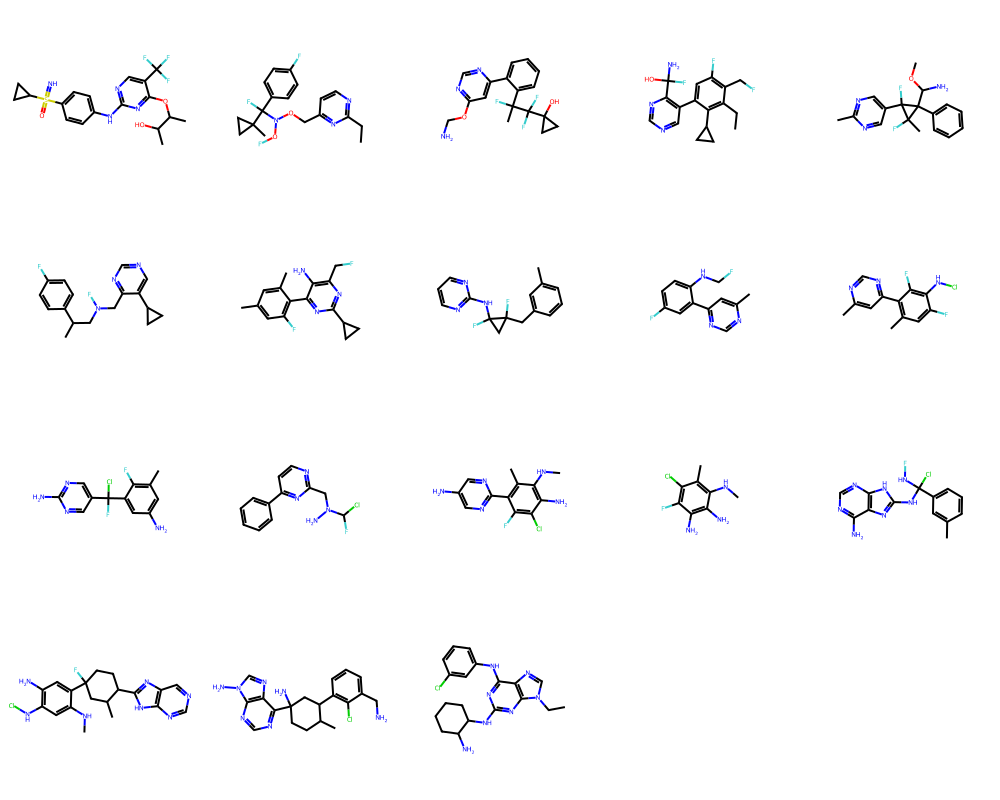

In [17]:
path2 = Draw.MolsToGridImage(
    [roni]+[rand_path2[i]['mols'][0] for i in range(16)]+[fp8], 
    molsPerRow = 5, 
    useSVG = True
)

path2

## Editable Mol Tests

In [12]:
ed_mol = Chem.RWMol(roni)

In [13]:
ed_frag = Chem.RWMol(frag_dict['*F']['mol'])

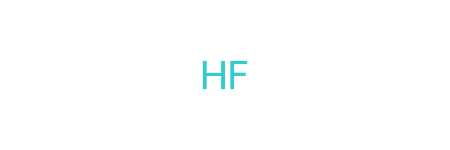

In [14]:
for a in ed_frag.GetAtoms():
    if a.GetSymbol() == '*':
        ed_frag.ReplaceAtom(a.GetIdx(), Chem.Atom(1))
AllChem.RemoveHs(ed_frag)

In [15]:
ed_frag.RemoveAtom(1)

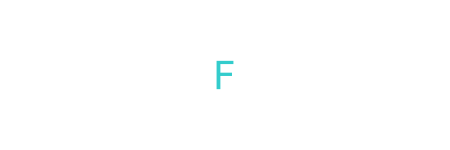

In [16]:
ed_frag

In [17]:
ed_mol.GetSubstructMatches(ed_frag)

((12,), (13,), (14,))

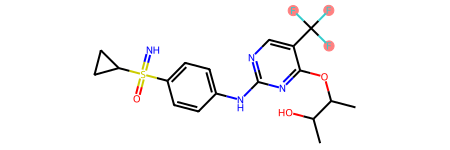

In [18]:
ed_mol